# **Author - Kislay Karan**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

**GRIP @ The Sparks Foundation**

# **TSF-Task 7_Stock_Market_Prediction_using_Numerical_and_Textual_Analysis**
# **( Level: Advanced )**

Date : 21-12-2022

Datasets used:

historical stock price : https://finance.yahoo.com/quote/%5EBSESN/history?p=%5EBSESN

News headlines : https://bit.ly/36fFPI6

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity

from nltk.sentiment.util import *
nltk.download('vader_lexicon')

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
     

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing libraries required for TEXTUAL ANALYSIS.

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#Importing Libraries required for PREDICTION

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving india-news-headlines.csv to india-news-headlines (3).csv


In [ ]:
import io
news = pd.read_csv(io.BytesIO(uploaded['india-news-headlines.csv']))
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
news.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [ ]:
df = pd.read_excel(open('Stock_Book_xl.xlsx', 'rb'),
              sheet_name='Stock_Book')  
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2022-12-16,61534.24,61893.22,61292.53,61337.81,61337.81,7000
1,2022-12-15,62530.07,62624.81,61715.61,61799.03,61799.03,5600
2,2022-12-14,62685.94,62835.11,62591.28,62677.91,62677.91,5700
3,2022-12-13,62300.67,62567.92,62129.57,62533.30,62533.30,12000
4,2022-12-12,61770.56,62239.42,61676.15,62130.57,62130.57,7000


**Stock Price Data**

In [ ]:
df.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
1464,2017-01-06,26929.69,27009.61,26733.33,26759.23,26759.23,7800
1465,2017-01-05,26738.42,26917.21,26738.42,26878.24,26878.24,9800
1466,2017-01-04,26677.22,26723.37,26606.06,26633.13,26633.13,8100
1467,2017-01-03,26616.92,26724.40,26488.37,26643.24,26643.24,9800
1468,2017-01-02,26711.15,26720.98,26447.06,26595.45,26595.45,8000


In [ ]:
df.describe()

,Open,High,Low,Close*,Adj Close**,Volume
count,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1.469000e+03
mean,42314.015480,42523.105534,42020.080851,42271.971212,42271.971212,2.308258e+05
std,10289.214962,10340.793110,10233.070549,10296.241322,10296.241322,1.944839e+06
min,26499.810000,26720.980000,25638.900000,25981.240000,25981.240000,1.000000e+02
25%,34335.380000,34488.690000,34103.530000,34300.470000,34300.470000,9.100000e+03
50%,38621.580000,38788.510000,38313.060000,38506.090000,38506.090000,1.310000e+04
75%,52477.190000,52629.180000,52054.760000,52372.690000,52372.690000,1.900000e+04
max,63357.990000,63583.070000,63183.770000,63284.190000,63284.190000,3.181510e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1469 non-null   datetime64[ns]
 1   Open         1469 non-null   float64       
 2   High         1469 non-null   float64       
 3   Low          1469 non-null   float64       
 4   Close*       1469 non-null   float64       
 5   Adj Close**  1469 non-null   float64       
 6   Volume       1469 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 80.5 KB


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# renaming Close*
df.rename(columns= {"Close*":"Close"}, inplace = True)

# filtering the important columns required
df = df[['Date', 'Open', 'Close', 'High', 'Low', 'Volume']].copy()

# sorting the data according to the index i.e 'Date'
df = df.sort_index(ascending=True, axis=0)

print(df.shape)
df.head(10)

(1469, 6)


,Date,Open,Close,High,Low,Volume
0,2022-12-16,61534.24,61337.81,61893.22,61292.53,7000
1,2022-12-15,62530.07,61799.03,62624.81,61715.61,5600
2,2022-12-14,62685.94,62677.91,62835.11,62591.28,5700
3,2022-12-13,62300.67,62533.30,62567.92,62129.57,12000
4,2022-12-12,61770.56,62130.57,62239.42,61676.15,7000
5,2022-12-09,62690.86,62181.67,62735.42,61889.11,7300
6,2022-12-08,62504.04,62570.68,62633.56,62320.18,13700
7,2022-12-07,62615.52,62410.68,62759.97,62316.65,4800
8,2022-12-06,62395.55,62626.36,62677.84,62390.07,6100
9,2022-12-05,62865.28,62834.60,62939.63,62507.88,13100


**Stock News Headlines Data**

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [ ]:
# dropping duplicates
news.drop_duplicates(inplace=True)

# filtering the important columns required
news = news.filter(['publish_date', 'headline_text'])

#Lets rename the column names of news dataset.
news.rename(columns={'publish_date':'Date','headline_text':'News'},inplace=True)

# coverting the datatype of column 'Date' from type string to type 'datetime'
news['Date']=news['Date'].apply(str)
news['Date'] = pd.to_datetime(news['Date'])

# sorting the data according to the index i.e 'Date'
news = news.sort_index(ascending=True, axis=0)
news

# grouping the news headlines according to 'Date'
news = news.groupby(['Date'])['News'].apply(lambda x: ','.join(x)).reset_index()
print(news.shape)
news.head(10)

(7717, 2)


,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,"Powerless north India gropes in the dark,Think..."
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
5,2001-01-07,"Muslim body rules out talks on Ayodhya,Bajrang..."
6,2001-01-08,"Sangh Parivar; Babri panel up the ante,Frontru..."
7,2001-01-09,Financier Bharat Shah held for alleged links w...
8,2001-01-10,"Fend for yourselves; Pande tells doctors,Burea..."
9,2001-01-23,"Sonia takes on the Hindutva brigade,Congress h..."


**Lets Remove the special charaters from the News text by creating a function.**

In [ ]:
def remove_special_chars(text):
    result=" "
    
    for i in text:
        if i.isalnum()  or i==' ':   # The isalnum() method returns True if all characters in the string are alphanumeric 
                                     # (either alphabets or numbers). If not, it returns False.
            result= result+i
            # print(result)
        else:
            result=result + " "
    return result.strip()   

In [ ]:
news['News']=news['News'].apply(remove_special_chars)

In [ ]:
#Grouping all the headlines for each day.

news['News']=news.groupby(['Date']).transform(lambda x: " ".join(x))   

#This is to join all the news of same date, in just one paragraph kind of.

In [ ]:
news.head(30)     #This seems like , the grouped text para , is repeating itself.
                          #Also indexing is also not correct as after 25 ,  52 appeard which is wrong.

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
5,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...
6,2001-01-08,Sangh Parivar Babri panel up the ante Frontru...
7,2001-01-09,Financier Bharat Shah held for alleged links w...
8,2001-01-10,Fend for yourselves Pande tells doctors Burea...
9,2001-01-23,Sonia takes on the Hindutva brigade Congress h...


In [ ]:
#So we can clearly observe that this is repeating the entire paragraph so we need to drop the duplicates and reset the index .

news.drop_duplicates(inplace=True)

news.head().reset_index(inplace=True,drop=True)

print(news.shape)

news.head()

(7717, 2)


,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


 **Combined Stock Data with News**

In [ ]:
#Just to look whether they are able to get merged or not ,lets perform the merge.

stock_data=pd.merge(news,df,how='inner',on='Date')

# dropping the null values if any
stock_data.dropna(axis=0, inplace=True)

# setting column 'Date' as the index column
stock_data.set_index('Date', inplace= True)

print(stock_data.shape)

# displaying the combined stock_data
stock_data.head(20)

(1292, 6)


,News,Open,Close,High,Low,Volume
Date,,,,,,
2017-01-02,Destress plan for the first Monday of 2017 Pun...,26711.15,26595.45,26720.98,26447.06,8000
2017-01-03,State opposition dismisses Samajwadi Party feu...,26616.92,26643.24,26724.40,26488.37,9800
2017-01-04,Rudra Soni ready to go bald for TV not Bollyw...,26677.22,26633.13,26723.37,26606.06,8100
2017-01-05,Decoding Buddhist prayer flags 3 Punjabi films...,26738.42,26878.24,26917.21,26738.42,9800
2017-01-06,Will stay bachelor to serve Akhilesh says thr...,26929.69,26759.23,27009.61,26733.33,7800
2017-01-09,All you need to know about travelling with a b...,26860.81,26726.55,26860.88,26701.18,6400
2017-01-10,Mulayam Singh calls off January 5 convention R...,26811.63,26899.56,26914.95,26804.17,8600
2017-01-11,Melt your fat Faculty of Technology and Engine...,26978.44,27140.41,27174.87,26978.44,12000
2017-01-12,Yoga A magical sugar pill Six new faces four...,27171.66,27247.16,27278.93,27166.69,11700


 **Textual Dataset Pre-Processing**
 
**Understand the Polarity and Subjectivity**


*   **Polarity** : It refers to the strength of an opinion. It could be positive or negative or neutral.
*   **Subjectivity** : It refers to the degree to which a person is personally involved in an object,

 when text is an explanatory article which must be analysed in context.


 

In [ ]:
#Function to get Subjectivity and Polarity.

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
#Applying subjectivity and polarity to the columns

stock_data['Subjectivity']=stock_data['News'].apply(get_subjectivity)
stock_data['Polarity']=stock_data['News'].apply(get_polarity)

Text(0.5, 1.0, 'Polarity Score')

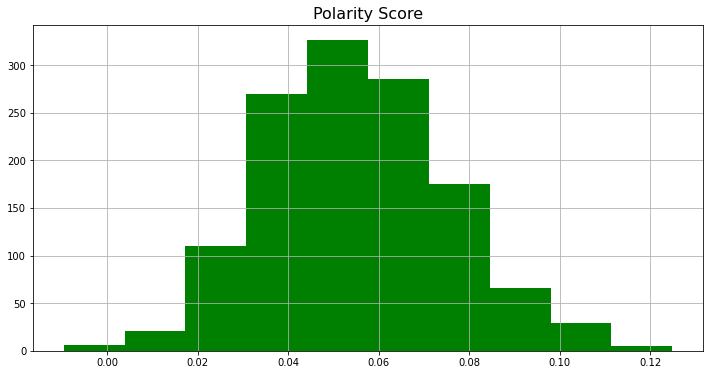

In [ ]:
plt.figure(figsize=(12,6))
stock_data['Polarity'].hist(color='green')
plt.title("Polarity Score",fontsize=16)

Text(0.5, 1.0, 'Subjectivity Score')

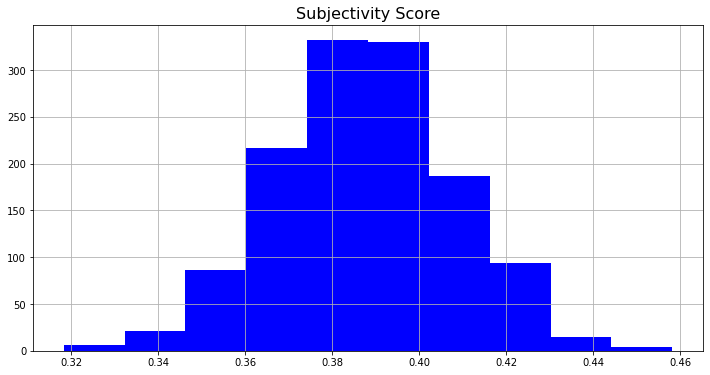

In [ ]:
plt.figure(figsize=(12,6))
stock_data['Subjectivity'].hist(color='blue')
plt.title("Subjectivity Score",fontsize=16)

**Calculating Sentiment Scores**

In [ ]:
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# calculating sentiment scores
stock_data['Compound'] = stock_data['News'].apply(lambda x: sia.polarity_scores(x)['compound'])
stock_data['Positive'] = stock_data['News'].apply(lambda x: sia.polarity_scores(x)['pos'])
stock_data['Neutral'] = stock_data['News'].apply(lambda x: sia.polarity_scores(x)['neu'])
stock_data['Negative'] = stock_data['News'].apply(lambda x: sia.polarity_scores(x)['neg'])

# displaying the stock data
stock_data.head(10)


,News,Open,Close,High,Low,Volume,Subjectivity,Polarity,Compound,Positive,Neutral,Negative
Date,,,,,,,,,,,,
2017-01-02,Destress plan for the first Monday of 2017 Pun...,26711.15,26595.45,26720.98,26447.06,8000,0.391158,0.045657,-0.9999,0.112,0.716,0.173
2017-01-03,State opposition dismisses Samajwadi Party feu...,26616.92,26643.24,26724.40,26488.37,9800,0.408734,0.041806,-0.9999,0.107,0.741,0.153
2017-01-04,Rudra Soni ready to go bald for TV not Bollyw...,26677.22,26633.13,26723.37,26606.06,8100,0.354810,0.073755,-1.0000,0.088,0.743,0.169
2017-01-05,Decoding Buddhist prayer flags 3 Punjabi films...,26738.42,26878.24,26917.21,26738.42,9800,0.376976,0.077180,-0.9999,0.107,0.735,0.159
2017-01-06,Will stay bachelor to serve Akhilesh says thr...,26929.69,26759.23,27009.61,26733.33,7800,0.395662,0.058126,-0.9999,0.105,0.740,0.155
2017-01-09,All you need to know about travelling with a b...,26860.81,26726.55,26860.88,26701.18,6400,0.400682,0.069864,-0.9996,0.108,0.756,0.136
2017-01-10,Mulayam Singh calls off January 5 convention R...,26811.63,26899.56,26914.95,26804.17,8600,0.373469,0.053015,-0.9999,0.102,0.736,0.162
2017-01-11,Melt your fat Faculty of Technology and Engine...,26978.44,27140.41,27174.87,26978.44,12000,0.398388,0.066791,-0.9999,0.104,0.733,0.164
2017-01-12,Yoga A magical sugar pill Six new faces four...,27171.66,27247.16,27278.93,27166.69,11700,0.382276,0.051923,-0.9999,0.120,0.724,0.156


In [ ]:
# dropping the 'headline_text (News)' not required
  stock_data.drop(['News'], inplace=True, axis=1)

# rearranging the columns of the whole stock_data
stock_data = stock_data[['Open','Close', 'High', 'Low', 'Volume','Compound', 'Positive', 'Neutral', 'Negative']]

# displaying the final stock_data
stock_data.head(10)

,Open,Close,High,Low,Volume,Compound,Positive,Neutral,Negative
Date,,,,,,,,,
2017-01-02,26711.15,26595.45,26720.98,26447.06,8000,-0.9999,0.112,0.716,0.173
2017-01-03,26616.92,26643.24,26724.40,26488.37,9800,-0.9999,0.107,0.741,0.153
2017-01-04,26677.22,26633.13,26723.37,26606.06,8100,-1.0000,0.088,0.743,0.169
2017-01-05,26738.42,26878.24,26917.21,26738.42,9800,-0.9999,0.107,0.735,0.159
2017-01-06,26929.69,26759.23,27009.61,26733.33,7800,-0.9999,0.105,0.740,0.155
2017-01-09,26860.81,26726.55,26860.88,26701.18,6400,-0.9996,0.108,0.756,0.136
2017-01-10,26811.63,26899.56,26914.95,26804.17,8600,-0.9999,0.102,0.736,0.162
2017-01-11,26978.44,27140.41,27174.87,26978.44,12000,-0.9999,0.104,0.733,0.164
2017-01-12,27171.66,27247.16,27278.93,27166.69,11700,-0.9999,0.120,0.724,0.156


In [ ]:
# saving the prepared stock_data to csv file
stock_data.to_csv('/content/drive/MyDrive/stock_data_final.csv')

**Reading Stock Data**

In [ ]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('/content/drive/MyDrive/stock_data_final.csv', index_col = False)

# # renaming the column
# stock_data.drop(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.head()

,Open,Close,High,Low,Volume,Compound,Positive,Neutral,Negative
Date,,,,,,,,,
2017-01-02,26711.15,26595.45,26720.98,26447.06,8000,-0.9999,0.112,0.716,0.173
2017-01-03,26616.92,26643.24,26724.40,26488.37,9800,-0.9999,0.107,0.741,0.153
2017-01-04,26677.22,26633.13,26723.37,26606.06,8100,-1.0000,0.088,0.743,0.169
2017-01-05,26738.42,26878.24,26917.21,26738.42,9800,-0.9999,0.107,0.735,0.159
2017-01-06,26929.69,26759.23,27009.61,26733.33,7800,-0.9999,0.105,0.740,0.155


In [ ]:
# displaying the shape i.e. number of rows and columns of stock_data
stock_data.shape

(1292, 9)

In [ ]:
# checking for null values
stock_data.isna().any()

Open        False
Close       False
High        False
Low         False
Volume      False
Compound    False
Positive    False
Neutral     False
Negative    False
dtype: bool

# **EDA of Stock Data**

Text(0, 0.5, 'Close Price ')

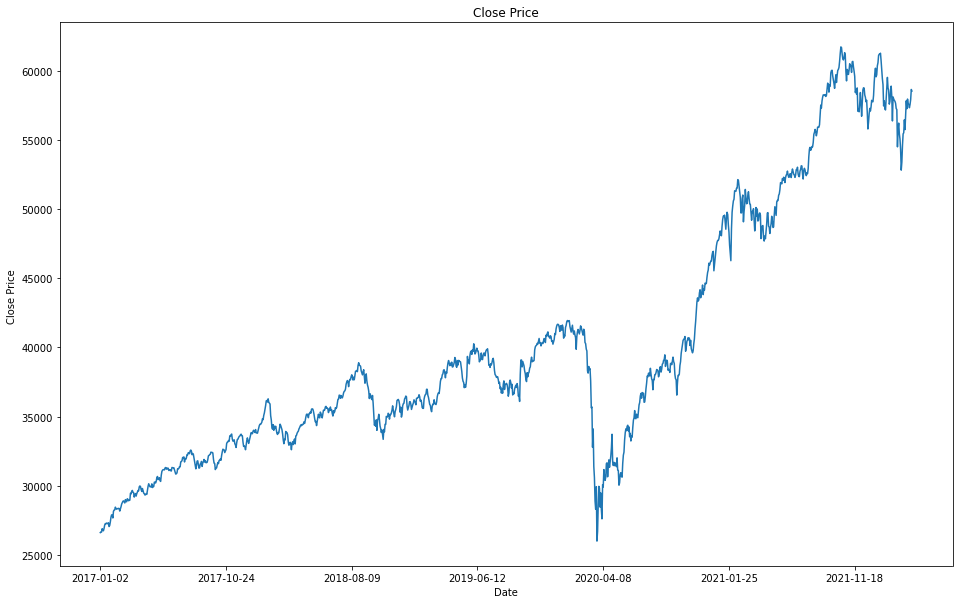

In [ ]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stock_data['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ')

In [ ]:
# calculating 7 day rolling mean
stock_data.rolling(7).mean().head(20)

,Open,Close,High,Low,Volume,Compound,Positive,Neutral,Negative
Date,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,26763.691429,26733.628571,26838.771429,26645.512857,8357.142857,-0.999871,0.104143,0.738143,0.158143
2017-01-11,26801.875714,26811.480000,26903.612857,26721.424286,8928.571429,-0.999871,0.103000,0.740571,0.156857
2017-01-12,26881.124286,26897.754286,26982.831429,26818.327143,9200.000000,-0.999871,0.104857,0.738143,0.157286


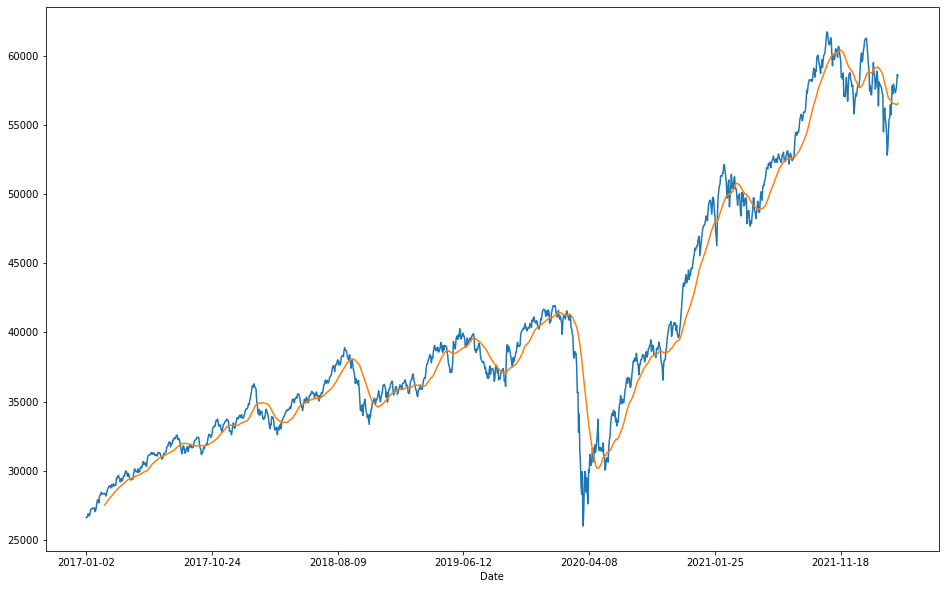

In [ ]:

# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

In [ ]:
# shifting next day close
stock_data['Close_price_shifted']= stock_data['Close'].shift(-1)

# shifting next day compound
stock_data['Compound_shifted'] =stock_data['Compound'].shift(-1) 

# dropping nulls
stock_data = stock_data.dropna()  
print(stock_data.shape)  
stock_data.head(10)

(1291, 11)


,Open,Close,High,Low,Volume,Compound,Positive,Neutral,Negative,Close_price_shifted,Compound_shifted
Date,,,,,,,,,,,
2017-01-02,26711.15,26595.45,26720.98,26447.06,8000,-0.9999,0.112,0.716,0.173,26643.24,-0.9999
2017-01-03,26616.92,26643.24,26724.40,26488.37,9800,-0.9999,0.107,0.741,0.153,26633.13,-1.0000
2017-01-04,26677.22,26633.13,26723.37,26606.06,8100,-1.0000,0.088,0.743,0.169,26878.24,-0.9999
2017-01-05,26738.42,26878.24,26917.21,26738.42,9800,-0.9999,0.107,0.735,0.159,26759.23,-0.9999
2017-01-06,26929.69,26759.23,27009.61,26733.33,7800,-0.9999,0.105,0.740,0.155,26726.55,-0.9996
2017-01-09,26860.81,26726.55,26860.88,26701.18,6400,-0.9996,0.108,0.756,0.136,26899.56,-0.9999
2017-01-10,26811.63,26899.56,26914.95,26804.17,8600,-0.9999,0.102,0.736,0.162,27140.41,-0.9999
2017-01-11,26978.44,27140.41,27174.87,26978.44,12000,-0.9999,0.104,0.733,0.164,27247.16,-0.9999
2017-01-12,27171.66,27247.16,27278.93,27166.69,11700,-0.9999,0.120,0.724,0.156,27238.06,-0.9998


In [ ]:
X = stock_data.drop('Close',axis=1)   #Features
X.head()

,Open,High,Low,Volume,Compound,Positive,Neutral,Negative,Close_price_shifted,Compound_shifted
Date,,,,,,,,,,
2017-01-02,26711.15,26720.98,26447.06,8000,-0.9999,0.112,0.716,0.173,26643.24,-0.9999
2017-01-03,26616.92,26724.40,26488.37,9800,-0.9999,0.107,0.741,0.153,26633.13,-1.0000
2017-01-04,26677.22,26723.37,26606.06,8100,-1.0000,0.088,0.743,0.169,26878.24,-0.9999
2017-01-05,26738.42,26917.21,26738.42,9800,-0.9999,0.107,0.735,0.159,26759.23,-0.9999
2017-01-06,26929.69,27009.61,26733.33,7800,-0.9999,0.105,0.740,0.155,26726.55,-0.9996


In [ ]:
X.shape

(1291, 10)

In [ ]:
y = stock_data['Close']              #Target
y.head()

Date
2017-01-02    26595.45
2017-01-03    26643.24
2017-01-04    26633.13
2017-01-05    26878.24
2017-01-06    26759.23
Name: Close, dtype: float64

# **Feature Scaling**

In [ ]:
cols= ['Open', 'High', 'Low','Close_price_shifted', 'Volume','Compound', 'Positive', 'Neutral', 'Negative','Compound_shifted']

**Normalization**

In [ ]:
# scaling the feature dataset
scaler = MinMaxScaler()
X = np.array(X).reshape( len(X) ,len(cols))
X = scaler.fit_transform(X)

# scaling the target variable
y = np.array (y).reshape ((len( y), 1))
y = scaler.fit_transform (y)


# **Splitting the Data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# **Deploying Different Models**



*   **Applying Random Forest Regressor**



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  3.6466789286413604e-05


 *   **Applying Decision Tree Regressor**


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  7.779927683973995e-05



* **Applying AdaBoost Regressor**




In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adb=AdaBoostRegressor()
adb.fit(X_train,y_train)

y_pred=adb.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.0002469938877659195


*   **Applying XGBoost Regressor**




In [ ]:
import xgboost as xgb

xgb=xgb.XGBRegressor()
xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

[05:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error :  4.7479136599814987e-05


# **Predictions**

In [ ]:
# performing predictions
predictions = xgb.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[0.30939102],
       [0.28452605],
       [0.25700444],
       [0.21719053],
       [0.24875847]], dtype=float32)

# **Model Evaluation**

In [ ]:
# calculating root mean squared error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 0.0069


In [ ]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 0.0069


In [ ]:
# unscaling the test feature dataset, x_test
X_test = scaler_X.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))
     

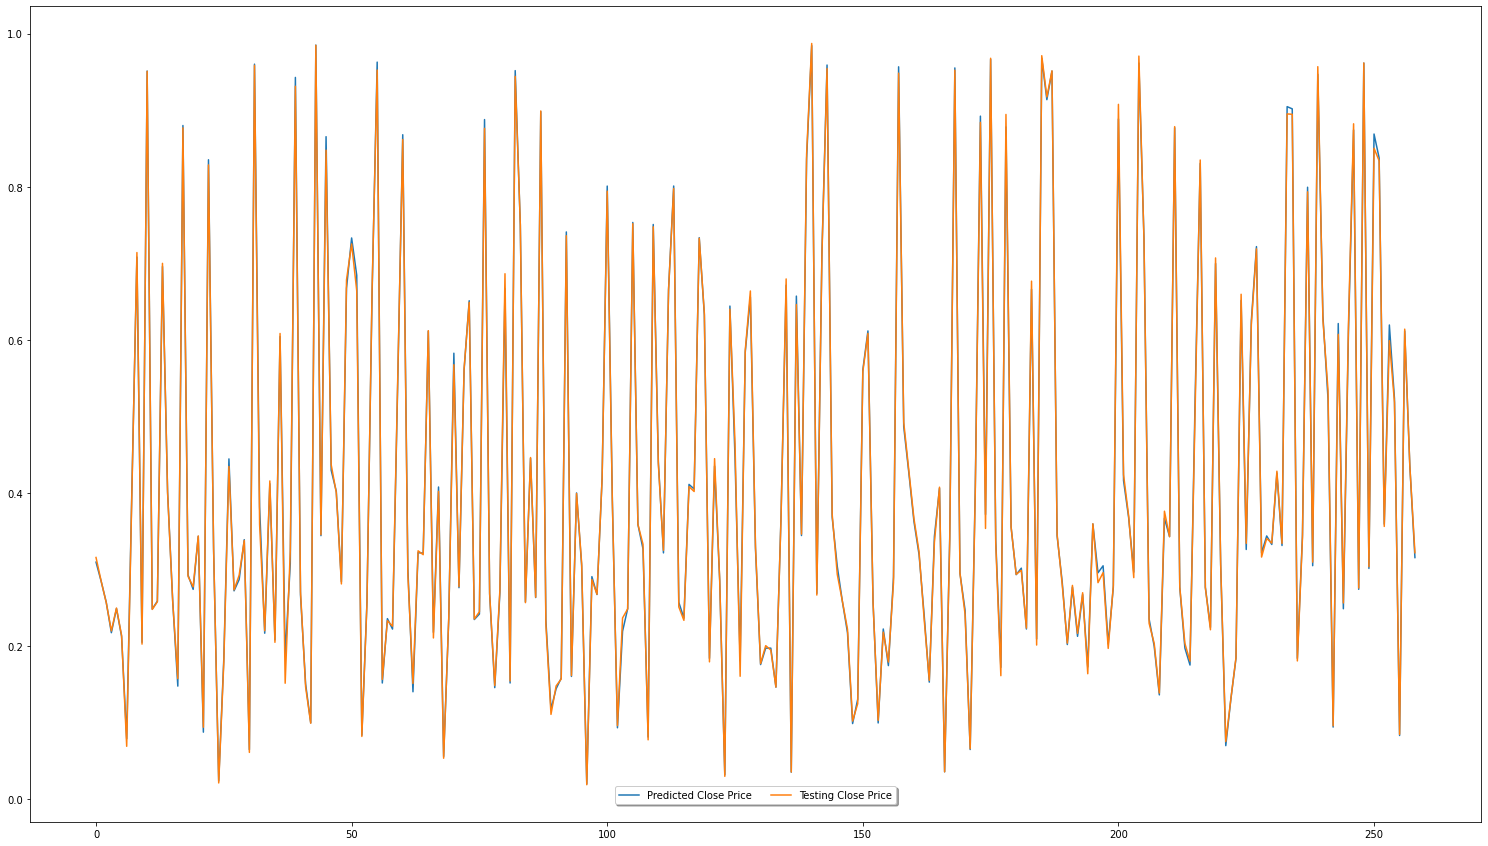

In [ ]:
# plotting
plt.figure(figsize=(26,15))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, +0.05), fancybox=True, shadow=True, ncol=2)
plt.show()